In [1]:
from pandas import *
import numpy as np
import matplotlib.pyplot as plt
import math
import colorsys
import webcolors
from webcolors import rgb_to_name
from webcolors import *

from PIL import Image
from natsort import natsorted, ns
import os

from scipy.spatial import KDTree


Code wird noch aufgeräumt und strukturiert dargestellt. Dies mache ich sobald ich mit der Ausformulierung des Papers fertig bin.

In [2]:
# row data for dominant color
dominant_color_data_settler_3 = read_csv("G:\\.shortcut-targets-by-id\\1m8mQSGFIpYWyBBuka4kAy332A9fQSMBX\\digital_humanities\\Ergebnisse\\DominantColor\\Die_Siedler3\\Die_Siedler3_dominant_color_row_data.csv")
dominant_color_data_diablo_2 = read_csv("G:\\.shortcut-targets-by-id\\1m8mQSGFIpYWyBBuka4kAy332A9fQSMBX\\digital_humanities\\Ergebnisse\\DominantColor\\Diablo2\\Diablo2_dominant_color_row_data.csv")
dominant_color_data_elden_ring = read_csv("G:\\.shortcut-targets-by-id\\1m8mQSGFIpYWyBBuka4kAy332A9fQSMBX\\digital_humanities\\Ergebnisse\\DominantColor\\Elden_Ring\\Elden_Ring_dominant_color_row_data.csv")
dominant_color_data_half_life_2 = read_csv("G:\\.shortcut-targets-by-id\\1m8mQSGFIpYWyBBuka4kAy332A9fQSMBX\\digital_humanities\\Ergebnisse\\DominantColor\\Half_Life2\\Half_Life2_dominant_color_row_data.csv")
dominant_color_data_little_nightmares = read_csv("G:\\.shortcut-targets-by-id\\1m8mQSGFIpYWyBBuka4kAy332A9fQSMBX\\digital_humanities\\Ergebnisse\\DominantColor\\Little_Nightmares\\Little_Nightmares_dominant_color_row_data.csv")
dominant_color_data_nfsmw = read_csv("G:\\.shortcut-targets-by-id\\1m8mQSGFIpYWyBBuka4kAy332A9fQSMBX\\digital_humanities\\Ergebnisse\\DominantColor\\NFSMW\\NFSMW_dominant_color_row_data.csv")
dominant_color_data_starcraft_2 = read_csv("G:\\.shortcut-targets-by-id\\1m8mQSGFIpYWyBBuka4kAy332A9fQSMBX\\digital_humanities\\Ergebnisse\\DominantColor\\Starcraft2\\Starcraft2_dominant_color_row_data.csv")
dominant_color_data_super_mario_world = read_csv("G:\\.shortcut-targets-by-id\\1m8mQSGFIpYWyBBuka4kAy332A9fQSMBX\\digital_humanities\\Ergebnisse\\DominantColor\\Super_Mario_World\\Super_Mario_World_dominant_color_row_data.csv")

# output folder for dominant color figures
output_path = "G:\\.shortcut-targets-by-id\\1m8mQSGFIpYWyBBuka4kAy332A9fQSMBX\\digital_humanities\\Ergebnisse\\DominantColor\\Figures_Paper\\"

In [3]:
# get rgb color values from the row data for the game
def getDominantColorValuesArr(row_data_path):
    color_values = row_data_path['dominatColor']
    color_values_arr = []
 
    for i in color_values:
        color_value = tuple(float(num) for num in i.replace('(', '').replace(')', '').replace('...', '').split(', '))
        color_values_arr.append(color_value)

    dominant_color_values_arr = tuple(tuple(map(int, tup)) for tup in color_values_arr)
    
    return dominant_color_values_arr

In [3]:
# get rgb color values from the row data for the game
def getDominantColorValuesArrPieChart(row_data_path):
    color_values = row_data_path['dominatColor']
    color_values_arr = []
 
    for i in color_values:
        color_value = tuple(float(num) for num in i.replace('(', '').replace(')', '').replace('...', '').split(', '))
        color_value = list(color_value)
        color_values_arr.append(color_value)

    #dominant_color_values_arr = tuple(tuple(map(int, tup)) for tup in color_values_arr)
    
    return color_values_arr

In [4]:
settler_values = getDominantColorValuesArr(dominant_color_data_settler_3)
diablo_values = getDominantColorValuesArr(dominant_color_data_diablo_2)
elden_ring_values = getDominantColorValuesArr(dominant_color_data_elden_ring)
half_life_values = getDominantColorValuesArr(dominant_color_data_half_life_2)
little_nightmares_values = getDominantColorValuesArr(dominant_color_data_little_nightmares)
nfsmw_values = getDominantColorValuesArr(dominant_color_data_nfsmw)
starcraft_values = getDominantColorValuesArr(dominant_color_data_starcraft_2)
mario_values = getDominantColorValuesArr(dominant_color_data_super_mario_world)

In [51]:
settler_values_pie_chart = getDominantColorValuesArrPieChart(dominant_color_data_settler_3)
print(1)
diablo_values_pie_chart = getDominantColorValuesArrPieChart(dominant_color_data_diablo_2)
print(2)
elden_ring_values_pie_chart = getDominantColorValuesArrPieChart(dominant_color_data_elden_ring)
print(3)
half_life_values_pie_chart = getDominantColorValuesArrPieChart(dominant_color_data_half_life_2)
print(4)
little_nightmares_values_pie_chart = getDominantColorValuesArrPieChart(dominant_color_data_little_nightmares)
print(5)
nfsmw_values_pie_chart = getDominantColorValuesArrPieChart(dominant_color_data_nfsmw)
print(6)
starcraft_values_pie_chart = getDominantColorValuesArrPieChart(dominant_color_data_starcraft_2)
print(7)
mario_values_pie_chart = getDominantColorValuesArrPieChart(dominant_color_data_super_mario_world)

1
2
3
4
5
6
7


In [21]:
def generateColorBarsFigure():
    figure, position = plt.subplots(8,1)
    figure.set_size_inches(10.5, 35)
    #figure(figsize=(8, 6), dpi=80)

    # Super Mario World
    position[0].imshow([[mario_values[i] for i in range(len(mario_values))]], extent=[0,len(mario_values),0,len(mario_values)/4], aspect='equal')
    position[0].set_title("Super Mario World", fontsize= 12, pad=10)
    position[0].set_yticks([])
    #position[7].set_xticks([])
    position[0].set_xlabel("frame")

    # Settler 3
    position[1].imshow([[settler_values[i] for i in range(len(settler_values))]], extent=[0,len(settler_values),0,len(settler_values)/4], aspect='equal')
    position[1].set_title("Settler 3", fontsize= 12, pad=10)
    position[1].set_yticks([])
    #position[0].set_xticks([])
    position[1].set_xlabel("frame")

    # Half Life 2
    position[2].imshow([[half_life_values[i] for i in range(len(half_life_values))]], extent=[0,len(half_life_values),0,len(half_life_values)/4], aspect='equal')
    position[2].set_title("Half Life 2", fontsize= 12, pad=10)
    position[2].set_yticks([])
    #position[3].set_xticks([])
    position[2].set_xlabel("frame")

    # Starcraft 2
    position[3].imshow([[starcraft_values[i] for i in range(len(starcraft_values))]], extent=[0,len(starcraft_values),0,len(starcraft_values)/4], aspect='equal')
    position[3].set_title("Starcraft 2", fontsize= 12, pad=10)
    position[3].set_yticks([])
    #position[6].set_xticks([])
    position[3].set_xlabel("frame")

    # Need for Speed Most Wanted
    position[4].imshow([[nfsmw_values[i] for i in range(len(nfsmw_values))]], extent=[0,len(nfsmw_values),0,len(nfsmw_values)/4], aspect='equal')
    position[4].set_title("Need for Speed Most Wanted", fontsize= 12, pad=10)
    position[4].set_yticks([])
    #position[5].set_xticks([])
    position[4].set_xlabel("frame")

    # Little Nighmares
    position[5].imshow([[little_nightmares_values[i] for i in range(len(little_nightmares_values))]], extent=[0,len(little_nightmares_values),0,len(little_nightmares_values)/4], aspect='equal')
    position[5].set_title("Little Nightmares", fontsize= 12, pad=10)
    position[5].set_yticks([])
    #position[4].set_xticks([])
    position[5].set_xlabel("frame")

    # Diablo 2
    position[6].imshow([[diablo_values[i] for i in range(len(diablo_values))]], extent=[0,len(diablo_values),0,len(diablo_values)/4], aspect='equal')
    position[6].set_title("Diablo 2", fontsize= 12, pad=10)
    position[6].set_yticks([])
    #position[1].set_xticks([])
    position[6].set_xlabel("frame")

    # Elden Ring
    position[7].imshow([[elden_ring_values[i] for i in range(len(elden_ring_values))]], extent=[0,len(elden_ring_values),0,len(elden_ring_values)/4], aspect='equal')
    position[7].set_title("Elden Ring", fontsize= 12, pad=10)
    position[7].set_yticks([])
    #position[2].set_xticks([])
    position[7].set_xlabel("frame")

    #plt.show()

    plt.savefig(f"{output_path}dominant_color_barcodes_figure.svg", dpi=100, format='svg')

In [ ]:
generateColorBarsFigure()

In [63]:
def convert_rgb_to_names(rgb_tuple):
    
    # a dictionary of all the hex and their respective names in css3
    css3_db = webcolors.CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return names[index]

In [53]:
def getColorPercentage(ouccrence, color_array):
    percentage = int(ouccrence / len(color_array) * 100)

    if percentage > 1:
        return str(percentage) + " %"
    else:
        return str("< 1 %")

In [5]:
def getSortedColorValues(color_values_list):
    sorted_color_arr = []

    def step (rgb, repetitions=1):
        r,g,b = rgb
        #color_arr.append('#{:02x}{:02x}{:02x}'.format(int(r), int(g), int(b)))
        lum = math.sqrt( .241 * r + .691 * g + .068 * b )
        h, s, v = colorsys.rgb_to_hsv(r,g,b)
        h2 = int(h * repetitions)
        lum2 = int(lum * repetitions)
        v2 = int(v * repetitions)

        if h2 % 2 == 1:
            v2 = repetitions - v2
            lum = repetitions - lum
            
        return (h2, lum, v2)
    
    for color in color_values_list:
        sorted_color_arr.append(color)

    sorted_color_arr.sort(key=lambda rgb: step(rgb,8))
   
    
    return sorted_color_arr


    #settler_values.sort()
    #settler_values.sort(key=lambda rgb: colorsys.rgb_to_hsv(*rgb)    )
    #settler_values.sort(key=lambda rgb: step(rgb,8))
    #settler_values_pie_chart_tuples = tuple(map(tuple, settler_values))
    #settler_values_pie_chart_tuples_int = tuple(tuple(map(int, tup)) for tup in settler_values_pie_chart_tuples)



sorted_settler_values = getSortedColorValues(settler_values)
sorted_diablo_values = getSortedColorValues(diablo_values)
sorted_mario_values = getSortedColorValues(mario_values)
sorted_little_nightmares_values = getSortedColorValues(little_nightmares_values)
sorted_elden_ring_values = getSortedColorValues(elden_ring_values)
sorted_nfsmw_values = getSortedColorValues(nfsmw_values)
sorted_starcraft_values = getSortedColorValues(starcraft_values)
sorted_half_life_values = getSortedColorValues(half_life_values)



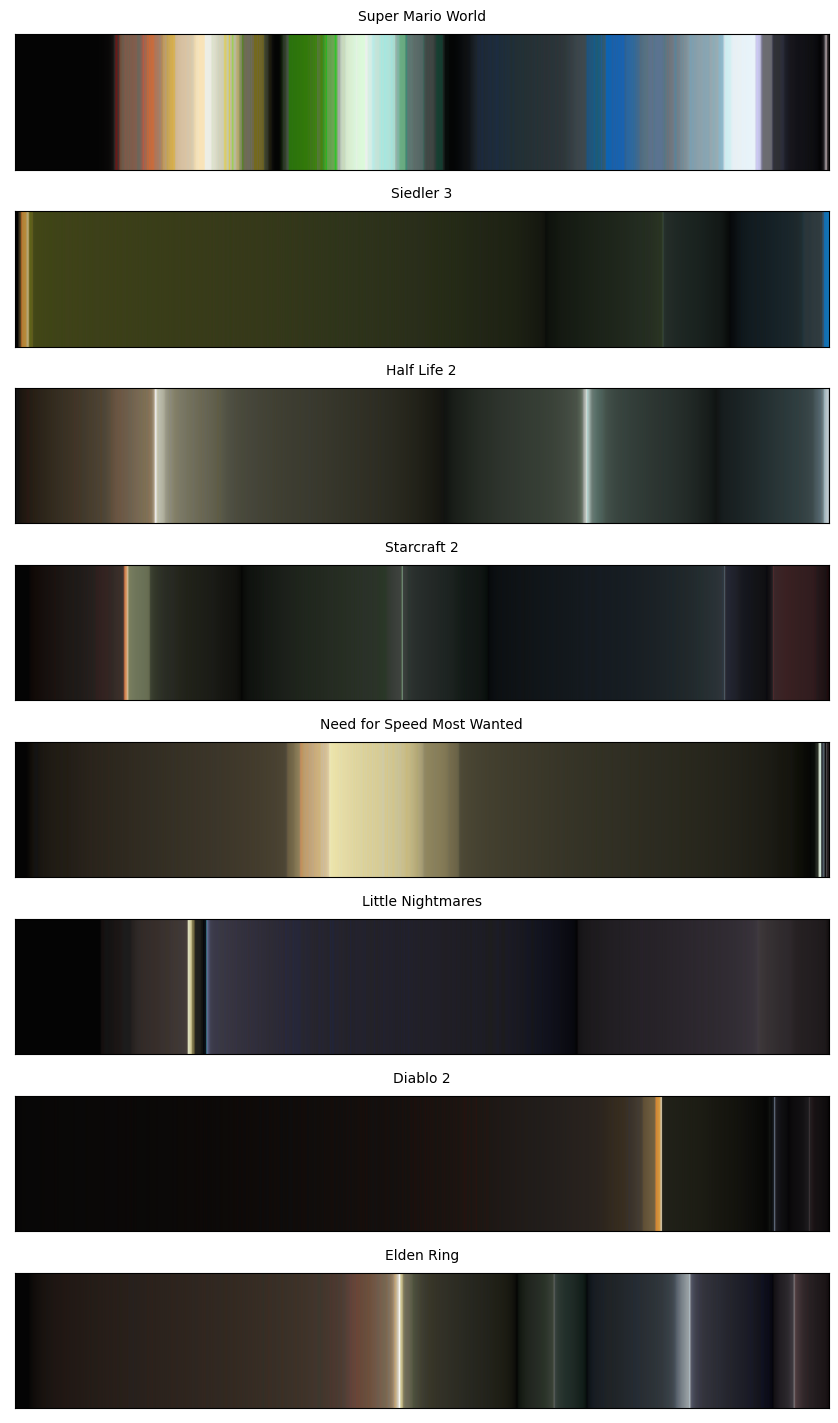

In [7]:
figure, position = plt.subplots(8,1)
figure.set_size_inches(10.5, 18)
#figure(figsize=(8, 6), dpi=80)

# Super Mario World
position[0].imshow([[sorted_mario_values[i] for i in range(len(sorted_mario_values))]], extent=[0,len(sorted_mario_values),0,len(sorted_mario_values)/6], aspect='equal')
position[0].set_title("Super Mario World", fontsize= 10, pad=10)
position[0].set_yticks([])
position[0].set_xticks([])
#position[0].set_xlabel("frame")

# Siedler 3
position[1].imshow([[sorted_settler_values[i] for i in range(len(sorted_settler_values))]], extent=[0,len(sorted_settler_values),0,len(sorted_settler_values)/6], aspect='equal')
position[1].set_title("Siedler 3", fontsize= 10, pad=10)
position[1].set_yticks([])
position[1].set_xticks([])
#position[1].set_xlabel("frame")

# Half Life 2
position[2].imshow([[sorted_half_life_values[i] for i in range(len(sorted_half_life_values))]], extent=[0,len(sorted_half_life_values),0,len(sorted_half_life_values)/6], aspect='equal')
position[2].set_title("Half Life 2", fontsize= 10, pad=10)
position[2].set_yticks([])
position[2].set_xticks([])
#position[1].set_xlabel("frame")

# Starcraft 2
position[3].imshow([[sorted_starcraft_values[i] for i in range(len(sorted_starcraft_values))]], extent=[0,len(sorted_starcraft_values),0,len(sorted_starcraft_values)/6], aspect='equal')
position[3].set_title("Starcraft 2", fontsize= 10, pad=10)
position[3].set_yticks([])
position[3].set_xticks([])
#position[1].set_xlabel("frame")

# Need for Speed Most Wanted
position[4].imshow([[sorted_nfsmw_values[i] for i in range(len(sorted_nfsmw_values))]], extent=[0,len(sorted_nfsmw_values),0,len(sorted_nfsmw_values)/6], aspect='equal')
position[4].set_title("Need for Speed Most Wanted", fontsize= 10, pad=10)
position[4].set_yticks([])
position[4].set_xticks([])
#position[1].set_xlabel("frame")

# Little Nightmares
position[5].imshow([[sorted_little_nightmares_values[i] for i in range(len(sorted_little_nightmares_values))]], extent=[0,len(sorted_little_nightmares_values),0,len(sorted_little_nightmares_values)/6], aspect='equal')
position[5].set_title("Little Nightmares", fontsize= 10, pad=10)
position[5].set_yticks([])
position[5].set_xticks([])
#position[1].set_xlabel("frame")

# Diablo 2
position[6].imshow([[sorted_diablo_values[i] for i in range(len(sorted_diablo_values))]], extent=[0,len(sorted_diablo_values),0,len(sorted_diablo_values)/6], aspect='equal')
position[6].set_title("Diablo 2", fontsize= 10, pad=10)
position[6].set_yticks([])
position[6].set_xticks([])
#position[1].set_xlabel("frame")

# Elden Ring
position[7].imshow([[sorted_elden_ring_values[i] for i in range(len(sorted_elden_ring_values))]], extent=[0,len(sorted_elden_ring_values),0,len(sorted_elden_ring_values)/6], aspect='equal')
position[7].set_title("Elden Ring", fontsize= 10, pad=10)
position[7].set_yticks([])
position[7].set_xticks([])
#position[1].set_xlabel("frame")


#plt.show()

plt.savefig(f"{output_path}sorted_dominant_color_barcodes_figure.svg", dpi=100, format='svg')

In [65]:
def getPieChartData(row_data_game):
    color_arr = []
    color_arr_final = []
    filler_arr = []
    labels_arr = []

    def step (rgb, repetitions=1):
        r,g,b = rgb
        #color_arr.append('#{:02x}{:02x}{:02x}'.format(int(r), int(g), int(b)))
        lum = math.sqrt( .241 * r + .691 * g + .068 * b )
        h, s, v = colorsys.rgb_to_hsv(r,g,b)
        h2 = int(h * repetitions)
        lum2 = int(lum * repetitions)
        v2 = int(v * repetitions)
        return (h2, lum, v2)

    
    settler_values_pie_chart_tuples = tuple(map(tuple, row_data_game))
    settler_values_pie_chart_tuples_int = tuple(tuple(map(int, tup)) for tup in settler_values_pie_chart_tuples)

    filter_arr = color_arr

    for i in row_data_game:
        #test_array.append(1)
        try:
            color_name = rgb_to_name(i, spec='css3')
            filter_arr.append(color_name)
            
            #filler_arr.append(1)
        except:
            filter_arr.append(convert_rgb_to_names(i))
            #filler_arr.append(1)
    filter_arr.sort()

    #print(len(color_arr))
    #print(len(filler_arr))
    #print(color_arr)

    for x in range(5):
        
        #most_freq_color = np.bincount(color_arr).argmax()
        unique,pos = np.unique(filter_arr,return_inverse=True)
        counts = np.bincount(pos)
        maxpos = counts.argmax() 

        most_freq_color = unique[maxpos]
        
        #unique, counts = np.unique(settler_values, return_counts=True)
        #filler_arr.append(np.count_nonzero(color_arr == most_freq_color))
        filler_arr.append(counts[maxpos])
        color_arr_final.append(most_freq_color)
        labels_arr.append(str(most_freq_color) + " (" + getColorPercentage(counts[maxpos], row_data_game) + ")")
        #color_arr.remove(most_freq_color)
        
        filter_arr = [x for x in filter_arr if x != most_freq_color]
    
    patches, texts = plt.pie(filler_arr, colors=color_arr_final)
    
    pie_chart_data = []
    pie_chart_data.append(filler_arr)
    pie_chart_data.append(color_arr_final)
    pie_chart_data.append(labels_arr)
    pie_chart_data.append(patches)

    return pie_chart_data


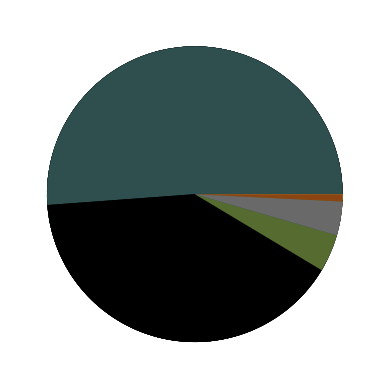

In [66]:
pie_chart_data_mario = getPieChartData(mario_values_pie_chart)
pie_chart_data_settler = getPieChartData(settler_values_pie_chart)
pie_chart_data_half_life = getPieChartData(half_life_values_pie_chart)
pie_chart_data_starcraft = getPieChartData(starcraft_values_pie_chart)
pie_chart_data_nfsmw = getPieChartData(nfsmw_values_pie_chart)
pie_chart_data_little_nightmares = getPieChartData(little_nightmares_values_pie_chart)
pie_chart_data_diablo = getPieChartData(diablo_values_pie_chart)
pie_chart_data_elden_ring = getPieChartData(elden_ring_values_pie_chart)

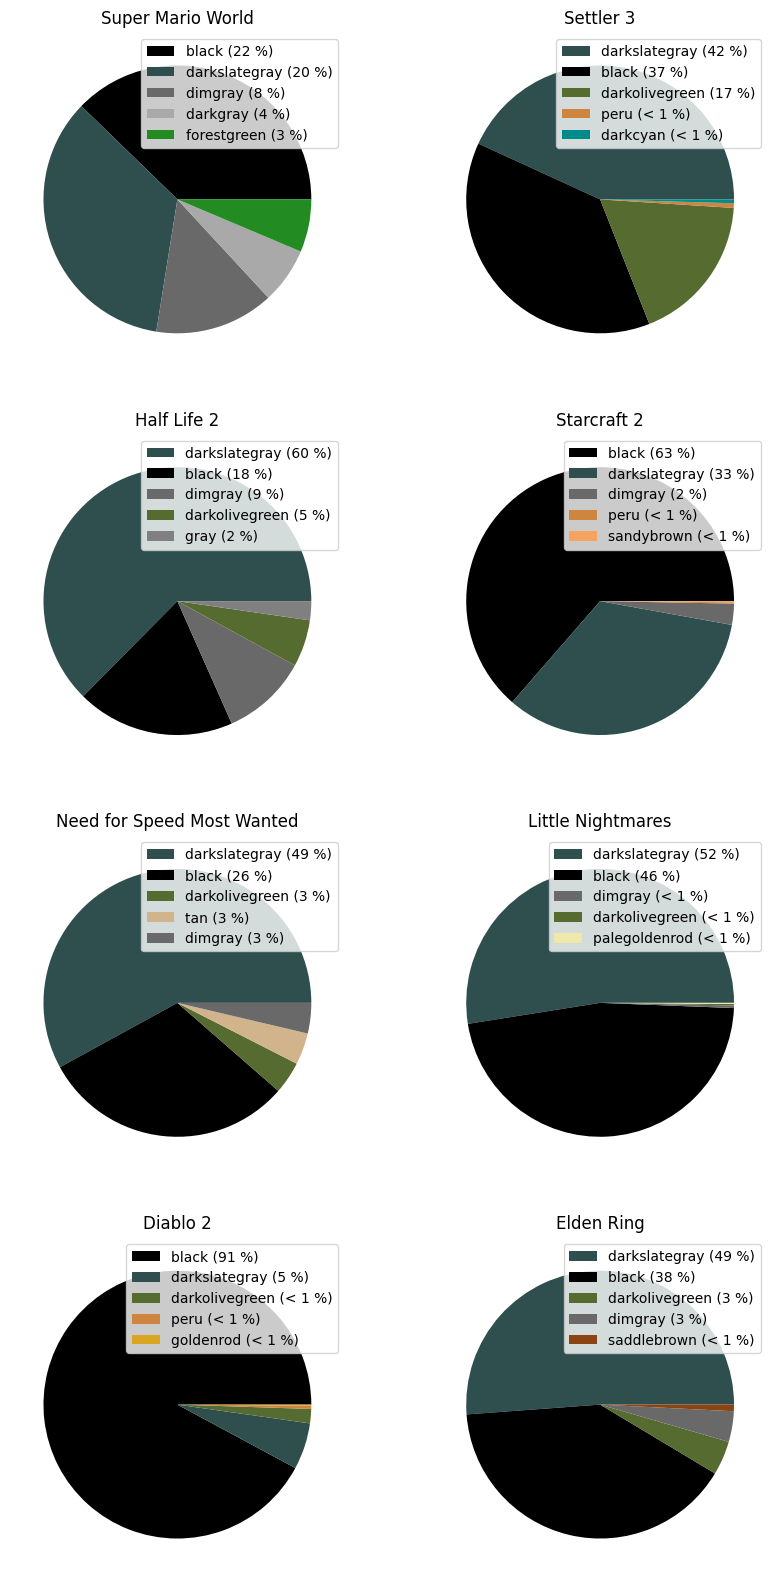

In [67]:
# pie chart figure for all games

fig = plt.figure(figsize=(10,20), dpi=100)
#figure.set_size_inches(38, 31)

pie_subplot = fig.add_subplot(421)
# Super Mario World

pie_subplot.pie(pie_chart_data_mario[0], colors=pie_chart_data_mario[1])
pie_subplot.legend(pie_chart_data_mario[3], pie_chart_data_mario[2], loc="best")
pie_subplot.set_title("Super Mario World")
#plt.show()

# Settler 3
pie_subplot = fig.add_subplot(422)

pie_subplot.pie(pie_chart_data_settler[0], colors=pie_chart_data_settler[1])
pie_subplot.legend(pie_chart_data_settler[3], pie_chart_data_settler[2], loc="best")
pie_subplot.set_title("Settler 3")

# Half Life 2
pie_subplot = fig.add_subplot(423)

pie_subplot.pie(pie_chart_data_half_life[0], colors=pie_chart_data_half_life[1])
pie_subplot.legend(pie_chart_data_half_life[3], pie_chart_data_half_life[2], loc="best")
pie_subplot.set_title("Half Life 2")

# Starcraft 2
pie_subplot = fig.add_subplot(424)

pie_subplot.pie(pie_chart_data_starcraft[0], colors=pie_chart_data_starcraft[1])
pie_subplot.legend(pie_chart_data_starcraft[3], pie_chart_data_starcraft[2], loc="best")
pie_subplot.set_title("Starcraft 2")

# Need for Speed Most Wanted
pie_subplot = fig.add_subplot(425)

pie_subplot.pie(pie_chart_data_nfsmw[0], colors=pie_chart_data_nfsmw[1])
pie_subplot.legend(pie_chart_data_nfsmw[3], pie_chart_data_nfsmw[2], loc="best")
pie_subplot.set_title("Need for Speed Most Wanted")

# Little Nighmares
pie_subplot = fig.add_subplot(426)

pie_subplot.pie(pie_chart_data_little_nightmares[0], colors=pie_chart_data_little_nightmares[1])
pie_subplot.legend(pie_chart_data_little_nightmares[3], pie_chart_data_little_nightmares[2], loc="best")
pie_subplot.set_title("Little Nightmares")

# Diablo 2
pie_subplot = fig.add_subplot(427)

pie_subplot.pie(pie_chart_data_diablo[0], colors=pie_chart_data_diablo[1])
pie_subplot.legend(pie_chart_data_diablo[3], pie_chart_data_diablo[2], loc="best")
pie_subplot.set_title("Diablo 2")

# Elden Ring
pie_subplot = fig.add_subplot(428)

pie_subplot.pie(pie_chart_data_elden_ring[0], colors=pie_chart_data_elden_ring[1])
pie_subplot.legend(pie_chart_data_elden_ring[3], pie_chart_data_elden_ring[2], loc="best")
pie_subplot.set_title("Elden Ring")


plt.show()

#fig.savefig(f"{output_path}dominant_color_pie_charts_figure.svg", dpi=100, format='svg')

In [ ]:
# folder in which the frames of the walkthrough are saved (Don't forget the "/" at the end)
path_to_game_frames = "G:\\.shortcut-targets-by-id\\1m8mQSGFIpYWyBBuka4kAy332A9fQSMBX\\digital_humanities\\Walkthroughs\\Die_Siedler3\\"

# list of frames in the folder
frames_list = os.listdir(path_to_game_frames)
# sorted list of frames in the folder
frames_list = natsorted(frames_list, alg=ns.PATH | ns.IGNORECASE)

all_colors_of_walkthrough = []

for frame in frames_list:
  print(frame)
  if frame.split(".")[-1].lower() in {"jpeg", "jpg"}:
      img = Image.open(path_to_game_frames + frame)
      size = w, h = img.size
      data = img.load()

      for x in range(w):
         for y in range(h):
            color = data[x,y]
            all_colors_of_walkthrough.append(color)

# führt zu memory fehler. Man sollte als Resultat pro Frame die dominant schon bilden. Wird eh schon gemacht, deswegen ist dieer Ansatz nicht sinnvoll.



In [ ]:
generateColorBarsFigure()